In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/JyothirmaiV13/Quest-labs-Ai/main/olist_orders_dataset.csv")

# Display the first few rows of the dataframe
print(df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [3]:
# Basic statistics of the dataset
print(df.describe())

# Check for any missing values
print(df.isnull().sum())

                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08

In [4]:

df1= pd.read_csv("https://raw.githubusercontent.com/JyothirmaiV13/Quest-labs-Ai/main/olist_order_reviews_dataset.csv")

# Display the first few rows of the dataframe
print(df1.head())
# Check for any missing values
print(df1.isnull().sum())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

In [5]:
df1.review_score.mean()

4.08642062404257

In [6]:
df1.review_score.median()

5.0

In [7]:
df2= pd.read_csv("https://raw.githubusercontent.com/JyothirmaiV13/Quest-labs-Ai/main/olist_order_items_dataset.csv")

# Display the first few rows of the dataframe
print(df2.head())
# Check for any missing values
print(df2.isnull().sum())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

from scipy.sparse.linalg import svds

In [9]:
print(df.shape)
print(df1.shape)
print(df2.shape)

(99441, 8)
(99224, 7)
(112650, 7)


In [10]:
print('unique customers and products')
print(df['customer_id'].nunique())
print(df['order_id'].nunique())

unique customers and products
99441
99441


In [11]:
print(df1['review_score'].describe())

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64


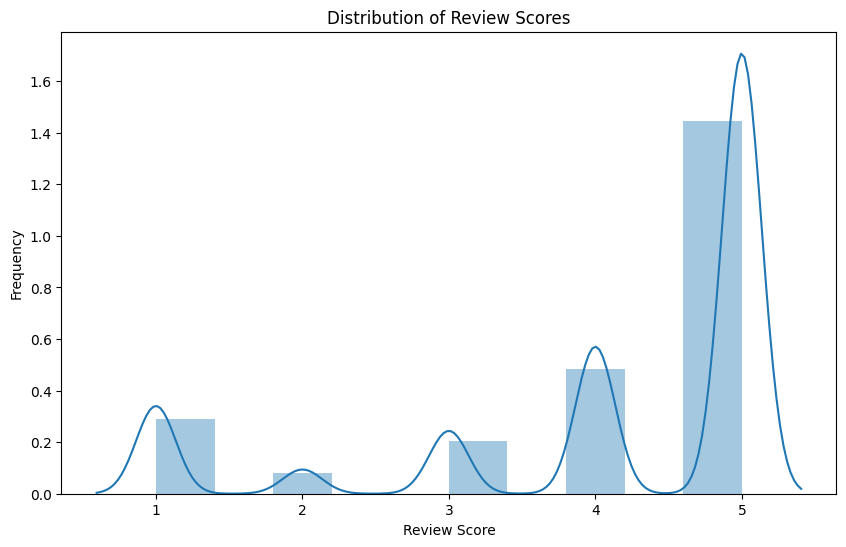

In [12]:
"""#! pip install --upgrade seaborn
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df1['review_score'], bins=10, kde=True)"""
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame

plt.figure(figsize=(10, 6))
sns.distplot(df1['review_score'], bins=10, kde=True)
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores')
plt.show()


In [13]:
print(df2['order_id'].nunique())
df2['order_id'].count()

98666


112650

In [14]:
#top 10 based on rating
most_rated=df1.groupby('order_id')['review_score'].count().sort_values(ascending=False).head(10)
most_rated

order_id
8e17072ec97ce29f0e1f111e598b0c85    3
c88b1d1b157a9999ce368f218a407141    3
03c939fd7fd3b38f8485a0f95798f1f6    3
df56136b8031ecd28e200bb18e6ddb2e    3
29062384ce4975f78aeba6a496510386    2
fd95ae805c63c534f1a64589e102225e    2
8b3c2785144e72ccba9b0213f0f1cd1e    2
82fd1196a459f594fb1d66e667fc74c4    2
ca263afd88a8a1200605adbd4b63cd7d    2
4703440eb9289d3769819920e98ec061    2
Name: review_score, dtype: int64

Rating matrix

In [15]:
"""final_ratings_matrix = df1.pivot(index = 'review_id', columns ='order_id', values = 'review_score').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

#Finding the number of non-zero entries in the interaction matrix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()"""

"final_ratings_matrix = df1.pivot(index = 'review_id', columns ='order_id', values = 'review_score').fillna(0)\nprint('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)\n\n#Finding the number of non-zero entries in the interaction matrix\ngiven_num_of_ratings = np.count_nonzero(final_ratings_matrix)\nprint('given_num_of_ratings = ', given_num_of_ratings)\n\n#Finding the possible number of ratings as per the number of users and products\npossible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]\nprint('possible_num_of_ratings = ', possible_num_of_ratings)\n\n#Density of ratings\ndensity = (given_num_of_ratings/possible_num_of_ratings)\ndensity *= 100\nprint ('density: {:4.2f}%'.format(density))\n\nfinal_ratings_matrix.head()"

In [16]:
df1['review_id'].count()

99224

In [17]:
print(df1['order_id'].count())
print(df1['order_id'].nunique())

99224
98673


In [18]:
ords=df1['order_id'][:500]
ratng=df1['review_score'][:500]

In [19]:
n_ords=len(ords)
n_ratgs=len(ratng)
print(ords.count(),ratng.count())
df_final=df1[:500]

500 500


In [20]:
!pip install torch torchvision torchaudio
import torch
import numpy as np
from torch.autograd import Variable
from tqdm import tqdm_notebook as tqdm
class MatrixFactorization(torch.nn.Module):
    def __init__(self, n_ords, n_ratgs, n_factors=20):
        super().__init__()
        # create order embeddings
        self.order_factors = torch.nn.Embedding(n_ords, n_factors) # think of this as a lookup table for the input.
        # create rating embeddings
        self.rating_factors = torch.nn.Embedding(n_ratgs, n_factors) # think of this as a lookup table for the input.
        self.order_factors.weight.data.uniform_(0, 0.05)
        self.rating_factors.weight.data.uniform_(0, 0.05)

    def forward(self, data):
        # matrix multiplication
        orders, ratings = data[:,0], data[:,1]
        return (self.user_factors(orders)*self.item_factors(ratings)).sum(1)


    def predict(self, order, rating):
        return self.forward(order, rating)

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [21]:
#Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0
final_ratings_matrix = df_final.pivot(index = 'order_id', columns ='review_id', values = 'review_score').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

#Finding the number of non-zero entries in the interaction matrix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (500, 500)
given_num_of_ratings =  500
possible_num_of_ratings =  250000
density: 0.20%


review_id,00390430316d2ec6557b4c9b4213da4e,004580d2657b221e45f84f4169675ecd,0185df4755be7045d22b951fba4a4b58,0272d07f5d34a8c3d31272e7ff967e7b,03215247632c5bc4a925c524d0a154ec,032cfb72d792d30b6181b482d85f8d1a,033fb23c97ecb11c0548f4763bef5773,036bac7dcf336feff8ee82009a67b01d,06aa3111724159bb69b8568181ec05c4,06f47dacd0575e592bf6a17e922ce6cd,...,f922b9d00a755863556181c1a366193d,f96d1a466e5ab6e27fdc40c535ce622a,fa82e03e20dd362ebe83572fc81398c7,fc58a37818aacbf958eca9d16b4e2e84,fdb0e5a14fb6456e28ce7b3b054b8843,fdbdb2629a7cde0f66657acc92084e7f,fe3db7c069d694bab50cc43463f91608,ff3a1044a7a8dfad3e9c8eae2a39420c,ff722b4c68783a4459a3adb9bb4e1d0d,ff9f8a64551756628d32142775149748
order_id,,,,,,,,,,,,,,,,,,,,,
00b9e0f8f588d0406a3de447eb606970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0193a99edc8c599aaa16f9b9e991efb8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02bd92abe094825e0683bacaacb64285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
031cf625cad56f5761e51c2675f0c0ae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
043f43899c67438005004d160d18f55c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
##SParse Matrix

In [23]:
from scipy.sparse import csr_matrix
final_ratings_sparse=csr_matrix(final_ratings_matrix.values)

In [24]:
# Singular Value Decomposition
U, s, Vt = svds(final_ratings_sparse, k = 50) # here k is the number of latent features

# Construct diagonal array in SVD
sigma = np.diag(s)

In [25]:
U.shape

(500, 50)

In [26]:
sigma.shape

(50, 50)

In [27]:
Vt.shape

(50, 500)

In [28]:
all_order_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Predicted ratings
preds_df = pd.DataFrame(abs(all_order_predicted_ratings), columns = final_ratings_matrix.columns)
preds_df.head()
preds_matrix = csr_matrix(preds_df.values)

In [29]:
import numpy as np

def recommend_items(order_index, interactions_matrix, preds_matrix, num_recommendations):

    # Get the order's ratings from the actual and predicted interaction matrices
    order_ratings = interactions_matrix[order_index,:].toarray().reshape(-1)
    order_predictions = preds_matrix[order_index,:].toarray().reshape(-1)

    #Creating a dataframe with actual and predicted ratings columns
    temp = pd.DataFrame({'order_ratings': order_ratings, 'order_predictions': order_predictions})
    temp['Recommended Products'] = np.arange(len(order_ratings))
    temp = temp.set_index('Recommended Products')

    #Filtering the dataframe where actual ratings are 0 which implies that the user has not interacted with that product
    temp = temp.loc[temp.order_ratings == 0]

    #Recommending products with top predicted ratings
    temp = temp.sort_values('order_predictions',ascending=False)#Sort the dataframe by order_predictions in descending order
    print('\nBelow are the recommended products for order(order_id = {}):\n'.format(order_index))
    print(temp['order_predictions'].head(num_recommendations))

In [30]:
recommend_items(121,final_ratings_sparse,preds_matrix,5)


Below are the recommended products for order(order_id = 121):

Recommended Products
150    6.560151e-16
221    5.092513e-16
70     5.043558e-16
73     3.868794e-16
350    3.626922e-16
Name: order_predictions, dtype: float64


In [31]:
recommend_items(100,final_ratings_sparse,preds_matrix,10)


Below are the recommended products for order(order_id = 100):

Recommended Products
264    3.931290e-16
339    3.551774e-16
226    2.970955e-16
392    2.663892e-16
300    2.037338e-16
439    2.009922e-16
160    1.835068e-16
287    1.808743e-16
154    1.714114e-16
70     1.451888e-16
Name: order_predictions, dtype: float64


In [32]:
final_ratings_matrix['order_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['order_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()


review_id,00390430316d2ec6557b4c9b4213da4e,004580d2657b221e45f84f4169675ecd,0185df4755be7045d22b951fba4a4b58,0272d07f5d34a8c3d31272e7ff967e7b,03215247632c5bc4a925c524d0a154ec,032cfb72d792d30b6181b482d85f8d1a,033fb23c97ecb11c0548f4763bef5773,036bac7dcf336feff8ee82009a67b01d,06aa3111724159bb69b8568181ec05c4,06f47dacd0575e592bf6a17e922ce6cd,...,f922b9d00a755863556181c1a366193d,f96d1a466e5ab6e27fdc40c535ce622a,fa82e03e20dd362ebe83572fc81398c7,fc58a37818aacbf958eca9d16b4e2e84,fdb0e5a14fb6456e28ce7b3b054b8843,fdbdb2629a7cde0f66657acc92084e7f,fe3db7c069d694bab50cc43463f91608,ff3a1044a7a8dfad3e9c8eae2a39420c,ff722b4c68783a4459a3adb9bb4e1d0d,ff9f8a64551756628d32142775149748
order_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
average_rating = final_ratings_matrix.mean()
average_rating.head()

review_id
00390430316d2ec6557b4c9b4213da4e    0.010
004580d2657b221e45f84f4169675ecd    0.010
0185df4755be7045d22b951fba4a4b58    0.010
0272d07f5d34a8c3d31272e7ff967e7b    0.006
03215247632c5bc4a925c524d0a154ec    0.010
dtype: float64

In [34]:
preds_df.head()

review_id,00390430316d2ec6557b4c9b4213da4e,004580d2657b221e45f84f4169675ecd,0185df4755be7045d22b951fba4a4b58,0272d07f5d34a8c3d31272e7ff967e7b,03215247632c5bc4a925c524d0a154ec,032cfb72d792d30b6181b482d85f8d1a,033fb23c97ecb11c0548f4763bef5773,036bac7dcf336feff8ee82009a67b01d,06aa3111724159bb69b8568181ec05c4,06f47dacd0575e592bf6a17e922ce6cd,...,f922b9d00a755863556181c1a366193d,f96d1a466e5ab6e27fdc40c535ce622a,fa82e03e20dd362ebe83572fc81398c7,fc58a37818aacbf958eca9d16b4e2e84,fdb0e5a14fb6456e28ce7b3b054b8843,fdbdb2629a7cde0f66657acc92084e7f,fe3db7c069d694bab50cc43463f91608,ff3a1044a7a8dfad3e9c8eae2a39420c,ff722b4c68783a4459a3adb9bb4e1d0d,ff9f8a64551756628d32142775149748
0,1.107594e-02,3.281206e-02,5.957522e-02,5.280964e-17,3.242811e-02,2.164145e-02,4.556424e-02,3.823025e-02,3.213331e-01,1.311487e-16,...,9.983953e-17,1.100025e-17,8.347257e-17,6.628847e-02,1.300566e-17,5.720125e-17,4.766024e-04,1.863697e-01,2.873608e-17,3.980211e-02
1,5.182343e-03,1.199432e-02,1.082123e-01,3.738261e-17,6.570040e-03,1.379424e-02,9.890692e-02,2.601755e-02,2.259816e-02,1.850922e-17,...,1.729154e-17,1.343046e-17,2.397155e-17,5.637485e-03,8.459822e-19,5.939628e-18,8.118916e-04,4.505302e-03,2.553972e-18,2.199950e-02
2,4.374753e-03,7.140642e-03,3.686119e-02,4.003941e-17,4.400231e-02,6.165775e-02,1.018420e-01,2.491725e-01,6.664732e-02,7.103256e-17,...,1.687057e-16,6.259818e-17,3.404127e-17,3.203336e-02,1.302333e-16,3.430712e-17,7.230113e-04,1.276784e-01,3.154248e-17,5.628213e-02
3,1.667797e-18,1.402594e-17,8.596507e-17,6.149731e-32,1.763040e-17,4.429713e-17,8.089514e-18,6.094309e-17,5.147956e-17,7.232583e-33,...,1.115880e-31,8.066324e-33,1.164498e-31,7.477781e-17,2.327734e-32,3.915807e-32,9.655699e-19,6.863236e-17,5.572879e-33,2.292018e-17
4,3.519029e-04,2.465889e-03,2.974930e-02,1.260819e-17,4.532651e-03,2.234199e-02,1.665125e-02,3.876569e-02,1.315264e-02,6.774188e-18,...,7.193913e-18,6.984760e-18,4.039849e-18,3.930803e-03,1.058917e-17,1.588102e-17,1.285166e-04,1.009107e-02,3.994552e-18,6.762757e-04


In [35]:
avg_preds=preds_df.mean()
avg_preds.head()

review_id
00390430316d2ec6557b4c9b4213da4e    3.349784e-03
004580d2657b221e45f84f4169675ecd    2.088022e-02
0185df4755be7045d22b951fba4a4b58    4.071939e-02
0272d07f5d34a8c3d31272e7ff967e7b    2.987095e-17
03215247632c5bc4a925c524d0a154ec    1.248051e-02
dtype: float64

In [36]:
rmse_df = pd.concat([average_rating, avg_preds], axis=1)

rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']

rmse_df.head()

,Avg_actual_ratings,Avg_predicted_ratings
review_id,,
00390430316d2ec6557b4c9b4213da4e,0.010,3.349784e-03
004580d2657b221e45f84f4169675ecd,0.010,2.088022e-02
0185df4755be7045d22b951fba4a4b58,0.010,4.071939e-02
0272d07f5d34a8c3d31272e7ff967e7b,0.006,2.987095e-17
03215247632c5bc4a925c524d0a154ec,0.010,1.248051e-02


In [37]:
RMSE=mean_squared_error(rmse_df['Avg_actual_ratings'], rmse_df['Avg_predicted_ratings'], squared=False)
print(f'RMSE SVD Model = {RMSE} \n')

RMSE SVD Model = 0.02560711239707969 



In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

#merged dataframe
mged=pd.merge(df,df1,on='order_id')
mged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51


In [39]:
print(mged.isnull().sum())


order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  156
order_delivered_carrier_date      1756
order_delivered_customer_date     2865
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title             87656
review_comment_message           58247
review_creation_date                 0
review_answer_timestamp              0
dtype: int64


In [40]:
mged1=mged[:500]
cust_item_matrix=mged1.pivot_table(index='customer_id',columns='order_id',values='review_score')
cust_item_matrix = cust_item_matrix.fillna(0)

prod_similarity=cosine_similarity(cust_item_matrix.T)
prod_similarity_df=pd.DataFrame(prod_similarity,index=cust_item_matrix.columns,columns=cust_item_matrix.columns)

def rec_products(order_id,num_recommendations=6):
  similarity_score = prod_similarity_df[order_id]
  similarity_items = similarity_score.sort_values(ascending=False)
  top_recommendations = similarity_score.head(num_recommendations)
  return top_recommendations

ord_id=mged1['order_id'][0]

recs=rec_products(ord_id,num_recommendations=6)
print(recs)

order_id
00571ded73b3c061925584feab0db425    0.0
01855f880aae9a984c7c33b26fcf2e02    0.0
01a75ac3dd000b7628a684be97c29234    0.0
02aec12849744e266394182861265286    0.0
0341b60065c49221a27293793f11b117    0.0
04040ee654b248cdc512a68ecc83e4cc    0.0
Name: e481f51cbdc54678b7cc49136f2d6af7, dtype: float64


In [41]:
from sklearn.neighbors import NearestNeighbors

prod_user_matrix=cust_item_matrix.T

knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(prod_user_matrix)

def get_knn_recommendations(order_id, num_recommendations=6):
    order_index = prod_user_matrix.index.get_loc(order_id)
    distances, indices = knn.kneighbors(prod_user_matrix.iloc[order_index, :].values.reshape(1, -1), n_neighbors=num_recommendations + 1)

    similar_items=indices.flatten(order='C')[1:]
    recommended_item_ids = prod_user_matrix.index[similar_items]
    return recommended_item_ids

ord_id = mged1['order_id'][85]
recommendations = get_knn_recommendations(ord_id, num_recommendations=6)
print("The products are",recommendations)

The products are Index(['af5b0604e113e1526593d505a26ef39d', 'acce194856392f074dbf9dada14d8d82',
       'ad21c59c0840e6cb83a9ceb5573f8159', 'ae17bb94dfb3eaf396cd393eace1de80',
       'aeb4c9d05ab11d7c6c9ca24f8c43bd70', 'b01875821b8dcb6abc61776f0f971bce'],
      dtype='object', name='order_id')


In [42]:
df3=pd.read_csv('olist_customers_dataset.csv')
df3_new=df3[:500]
df_new=df[:500]

data=pd.merge(df_new,df3_new,on='customer_id')
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,f11b36b3bc7bacf06deef862ed611f02,ae8db0691449a44352e7d535ddf78c5e,delivered,2018-05-15 09:10:20,2018-05-16 03:14:50,2018-05-16 15:47:00,2018-05-22 20:37:31,2018-05-30 00:00:00,ad28944afc91824e30366a595654aaa4,11440,guaruja,SP


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

# Sample user-item interaction data with zip codes
df=data

# Create a binary interaction matrix for the items purchased
interaction_matrix = pd.crosstab(df['customer_id'], df['order_id'])
interaction_matrix = interaction_matrix.applymap(lambda x: 1 if x > 0 else 0)

# Add the zip code information to the interaction matrix
interaction_matrix['zip_code'] = df.drop_duplicates('customer_id').set_index('customer_id')['customer_zip_code_prefix']

# Encode the zip codes as numerical values
label_encoder = LabelEncoder()
interaction_matrix['zip_code_encoded'] = label_encoder.fit_transform(interaction_matrix['zip_code'])

# Prepare the feature matrix and target matrix
X = interaction_matrix.drop(columns=['zip_code'])
y = interaction_matrix.drop(columns=['zip_code', 'zip_code_encoded'])

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Train the Naive Bayes model
model = MultinomialNB()
#model.fit(X_train, y_train)
model.fit(X,y)

# Function to get product recommendations based on zip code
def get_nb_recommendations(zip_code, num_recommendations=5):
    # Encode the zip code
    zip_code_encoded = label_encoder.transform([zip_code])[0]

    # Create a feature vector with the encoded zip code
    feature_vector = pd.DataFrame([0] * (X.shape[1] - 1) + [zip_code_encoded]).T
    feature_vector.columns = X.columns

    # Predict the probabilities of each item being purchased
    item_probabilities = model.predict_proba(feature_vector)

    # Get the items with the highest probabilities
    recommended_items = {}
    for idx, class_prob in enumerate(item_probabilities[0]):
        recommended_items[y.columns[idx]] = class_prob

    # Sort the items by probability and return the top N items
    recommended_items = sorted(recommended_items.items(), key=lambda x: x[1], reverse=True)
    return [item[0] for item in recommended_items[:num_recommendations]]

# Example usage: Get recommendations for a customer from zip code '12345'
zip_code = 58989

recommendations = get_nb_recommendations(zip_code, num_recommendations=3)
print(f"Recommendations for zip code {zip_code}:\n{recommendations}")

'# Prepare the feature matrix and target matrix\nX = interaction_matrix.drop(columns=[\'zip_code\'])\ny = interaction_matrix.drop(columns=[\'zip_code\', \'zip_code_encoded\'])\n\n# Split the data into training and test sets\n#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)\n\n# Train the Naive Bayes model\nmodel = MultinomialNB()\n#model.fit(X_train, y_train)\nmodel.fit(X,y)\n\n# Function to get product recommendations based on zip code\ndef get_nb_recommendations(zip_code, num_recommendations=5):\n    # Encode the zip code\n    zip_code_encoded = label_encoder.transform([zip_code])[0]\n    \n    # Create a feature vector with the encoded zip code\n    feature_vector = pd.DataFrame([0] * (X.shape[1] - 1) + [zip_code_encoded]).T\n    feature_vector.columns = X.columns\n    \n    # Predict the probabilities of each item being purchased\n    item_probabilities = model.predict_proba(feature_vector)\n    \n    # Get the items with the highest proba